<h1 style="text-align : center"> <font color="red" size=8>IMBALANCED DATA </h1>

## <font color="dark blue">WHAT IS IMBALANCED DATASET?
- An Imabalanced Dataset is a classification problem where the number of samples of one class is high & other class is low.
 
- Imbalanced dataset is a common issue in ML where the distribution of samples among classes is not uniform.
 
- This can lead to biased outcomes & poor performance when predicting the Minority class.
    
- The __Predominant Label__ is called the __`Majority Class`__, while the less common label is called the __`Minority Class`__.
 
- __Majority Class__ $\rightarrow$ High samples class

- __Minority Class__ $\rightarrow$ Low samples class
    
- So that reason, the model is biased toward majority class & perform poorly on minority class.

## <font color="dark blue">WHY IMBALANCED DATA IS PROBLEMED?
- Give Biased Model $\Longrightarrow$ Biasd toward Majority class & perform poor on minority class.
    
- Inaccurate Metrics $\Longrightarrow$ Traditional Metrics like accuracy is misleading.

## <font color="dark blue">TREATMENT OF IMBALANCED DATA

## <font color="blue">a. UNDERSAMPLING TECHNIQUE
- In this technique, we take our majority class and sample it to balance with the minority class.

### <font color="green">ADVANTAGES
- Reduction in bias.
- Faster Training

### <font color="green">DISADVANTAGES
- Information loss leading to underfitting
- Sampling Bias

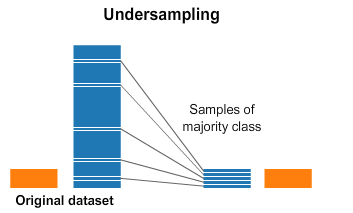

## <font color="orange"> CODE FOR UNDERSAMPLING TECHNIQUE

In [1]:
# Importing scikit-learn, pandas library
from sklearn.utils import resample
from sklearn.datasets import make_classification
import pandas as pd

# Making DataFrame having 100
# dummy samples with 4 features 
# Divided in 2 classes in a ratio of 80:20 
X, y = make_classification(n_classes=2, 
                           weights=[0.8, 0.2],
                           n_features=4, 
                           n_samples=100, 
                           random_state=42)

df = pd.DataFrame(X, columns=['feature_1',
                              'feature_2',
                              'feature_3',
                              'feature_4'])
df['balance'] = y
print(df)

# Let df represent the dataset
# Dividing majority and minority classes
df_major = df[df.balance == 0]
df_minor = df[df.balance == 1]

# Upsampling minority class
df_minor_sample = resample(df_minor,
                           
                           # Upsample with replacement
                           replace=True,    
                           
                           # Number to match majority class
                           n_samples=80,   
                           random_state=42)

# Combine majority and upsampled minority class
df_sample = pd.concat([df_major, df_minor_sample])

# Display count of data points in both class
print(df_sample.balance.value_counts())

    feature_1  feature_2  feature_3  feature_4  balance
0   -1.053839  -1.027544  -0.329294   0.826007        1
1    1.569317   1.306542  -0.239385  -0.331376        0
2   -0.658926  -0.357633   0.723682  -0.628277        0
3   -0.136856   0.460938   1.896911  -2.281386        0
4   -0.048629   0.502301   1.778730  -2.171053        0
..        ...        ...        ...        ...      ...
95  -2.241820  -1.248690   2.357902  -2.009185        0
96   0.573042   0.362054  -0.462814   0.341294        1
97  -0.375121  -0.149518   0.588465  -0.575002        0
98   1.042518   1.058239   0.461945  -0.984846        0
99  -0.121203  -0.043997   0.204211  -0.203119        0

[100 rows x 5 columns]
0    80
1    80
Name: balance, dtype: int64


In [6]:
# Importing imblearn library
from imblearn.under_sampling import RandomUnderSampler
from sklearn.datasets import make_classification

# Making Dataset having
# 100 dummy samples with 4 features
# Divided in 2 classes in a ratio of 80:20
X, y = make_classification(n_classes=2,
                           weights=[0.8, 0.2],
                           n_features=4,
                           n_samples=100,
                           random_state=42)

# Printing number of samples
# in each class before Under-Sampling
t = [(d) for d in y if d == 0]
s = [(d) for d in y if d == 1]
print('Before Under-Sampling: ')
print('Samples in class 0: ', len(t))
print('Samples in class 1: ', len(s))

# Down-Sampling majority class
UnderS = RandomUnderSampler(random_state=42,
                            replacement=True)

# Fit predictor (x variable)
# and target (y variable) using fit_resample()
X_Under, Y_Under = UnderS.fit_resample(X, y)

# Printing number of samples in
# each class after Under-Sampling
t = [(d) for d in Y_Under if d == 0]
s = [(d) for d in Y_Under if d == 1]
print()
print('After Under-Sampling: ')
print('Samples in class 0: ', len(t))
print('Samples in class 1: ', len(s))

Before Under-Sampling: 
Samples in class 0:  80
Samples in class 1:  20

After Under-Sampling: 
Samples in class 0:  20
Samples in class 1:  20


### <font color="dark green"> IMPORTANT PARAMETERS RANDOM-UNDERSAMPLING CLASS

__1. sampling_strategy__: Sampling Information for dataset.Some Values are- ‘minority’: only minority class ‘not minority’: all classes except minority class, ‘not majority’: all classes except majority class, ‘all’: all classes,  ‘auto’: similar to ‘not majority’, Default value is ‘auto’.
                        
                        
__2. random_state__: Used for shuffling the data. If a positive non-zero number is given then it shuffles otherwise not. Default value is None.
    
    
__3. shrinkage__: Parameter controlling the shrinkage. Values are: float: Shrinkage factor applied on all classes. dict: Every class will have a specific shrinkage factor. None: Shrinkage= 0. Default value is None.

## <font color="blue">b. OVERSAMPLING TECHNIQUE
- In this technique, we take our minority class & create random duplicates to balance with the majority class.
- Basically, we upsampling the minority class.

### <font color="green">ADVANTAGES
- Reduce bias.

### <font color="green">DISADVANTAGES
- Increase in size
- Duplication of data may cause Overfitting

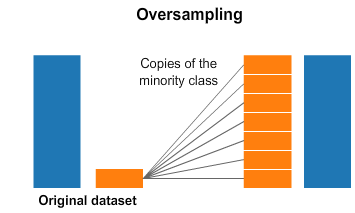

## <font color="orange"> CODE FOR OVERSAMPLING TECHNIQUE

In [5]:
# Importing imblearn library for over-sampling
from imblearn.over_sampling import RandomOverSampler
from sklearn.datasets import make_classification

# Making a dataset with 100 dummy samples and 4 features, divided into 2 classes in a ratio of 80:20
X, y = make_classification(n_classes=2, weights=[
                           0.8, 0.2], n_features=4, n_samples=100, random_state=42)

# Printing the number of samples in each class before Over-Sampling
class_0_samples = sum(1 for label in y if label == 0)
class_1_samples = sum(1 for label in y if label == 1)
print('Before Over-Sampling:')
print('Samples in class 0:', class_0_samples)
print('Samples in class 1:', class_1_samples)

# Applying random over-sampling
over_sampler = RandomOverSampler(random_state=42)
X_over, y_over = over_sampler.fit_resample(X, y)

# Printing the number of samples in each class after Over-Sampling
class_0_samples_after = sum(1 for label in y_over if label == 0)
class_1_samples_after = sum(1 for label in y_over if label == 1)
print()
print('After Over-Sampling:')
print('Samples in class 0:', class_0_samples_after)
print('Samples in class 1:', class_1_samples_after)

Before Over-Sampling:
Samples in class 0: 80
Samples in class 1: 20

After Over-Sampling:
Samples in class 0: 80
Samples in class 1: 80


### <font color="dark green"> IMPORTANT PARAMETERS RANDOM-OVERSAMPLING CLASS

__1. sampling_strategy__: Sampling Information for dataset.
    

__2. random_state__: Used for shuffling the data. If positive non zero number is given then it shuffles otherwise not. Default value is None.
    
    
__3. replacement__: Implements resampling with or without replacement. Boolean type of value. Default value is False.

## <font color="blue">c. SMOTE TECHNIQUE
- SMOTE stands for __Synthetic Minority Oversampling Technique__.

- It is a type of `Oversampling Technique`.

- Here we donot do any duplication, we generate new data. so to create new data, this technique use __Interpolation method__.

- By using this method, we generate new data in between two minority class data.

- SMOTE is used to generate artificial/synthetic samples for the minority class. This technique works by randomly choosing a sample from a minority class and determining K-Nearest Neighbors for this sample, then the artificial sample is added between the picked sample and its neighbors. This function is present in imblearn module.
    
### <font color="green">STEPS OF SMOTE TECHNIQUE
__1__. __Identify the Minority Class__: Determine the class with fewer samples.
    
__2__. __Select a Minority Class Instance__: Randomly select a minority class instance.
    
__3__. __Find Nearest Neighbors__: Identify the k-nearest neighbors of the selected instance.
    
__4__. __Generate Synthetic Samples__: For each neighbor, create a new synthetic sample by linearly interpolating between the selected instance and the neighbor.
    
__5__. __Repeat__: Repeat steps 2-4 until the desired number of synthetic samples is generated


### <font color="green">DISADVANTAGES
- Does not handle categorical data well.
- Computationally Complexity.
- Dependency on the choice of neighbour.
- Sensitive to outliers.
- Balance achieved may not reflect True Outcome.

## <font color="orange"> CODE FOR SMOTE TECHNIQUE

In [8]:
# Importing imblearn, scikit-learn library
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification

# Making Dataset having
# 100 dummy samples with 4 features 
# Divided in 2 classes in a ratio of 80:20 
X, y = make_classification(n_classes=2, 
                           weights=[0.8, 0.2],
                           n_features=4, 
                           n_samples=100, 
                           random_state=42)

# Printing number of samples in
# each class before Over-Sampling
t = [(d) for d in y if d==0]
s = [(d) for d in y if d==1]
print('Before Over-Sampling: ')
print('Samples in class 0: ',len(t))
print('Samples in class 1: ',len(s))


# Making an instance of SMOTE class 
# For oversampling of minority class
smote = SMOTE()

# Fit predictor (x variable)
# and target (y variable) using fit_resample()
X_OverSmote, Y_OverSmote = smote.fit_resample(X, y)

# Printing number of samples
# in each class after Over-Sampling
t = [(d) for d in Y_OverSmote if d==0]
s = [(d) for d in Y_OverSmote if d==1]
print()
print('After Over-Sampling: ')
print('Samples in class 0: ',len(t))
print('Samples in class 1: ',len(s))

Before Over-Sampling: 
Samples in class 0:  80
Samples in class 1:  20

After Over-Sampling: 
Samples in class 0:  80
Samples in class 1:  80


### <font color="dark green"> IMPORTANT PARAMETERS SMOTE CLASS
__1. sampling_strategy__: Sampling Information for dataset.
    
__2. random_state__: Used for shuffling the data. If positive non zero number is given then it shuffles otherwise not. Default value is None.
    
__3. k_neighbors__: Number count of nearest neighbours used to generate artificial/synthetic samples. Default value is 5
    
__4. n_jobs__: Number of CPU cores to be used. Default value is None. None here means 1 not 0

## <font color="blue">d. ENSEMBLE METHOD
- In this method, we take our imbalanaced dataset, then create sample dataset which are balanced dataset. After that we build a model.

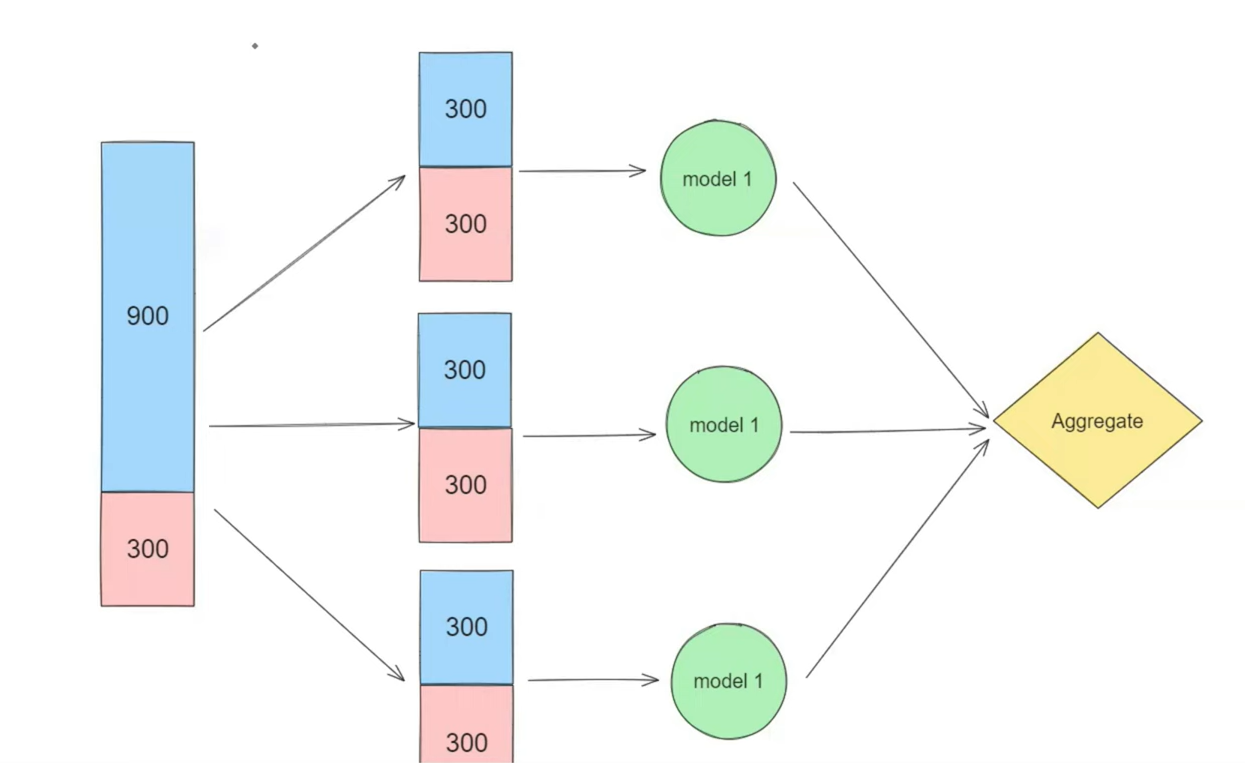